<a href="https://colab.research.google.com/github/annanasnas/digital_signal_processing/blob/main/%D0%A1%D0%A03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Самостоятельная работа №3#

Выполнили студенты БИБ191:
Сюракшина Анастасия,
Холодов Даниил


## Дискретные фильтры ##

####Фильтр нижних частот

In [2]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import control
import scipy

import warnings
warnings.filterwarnings('ignore')

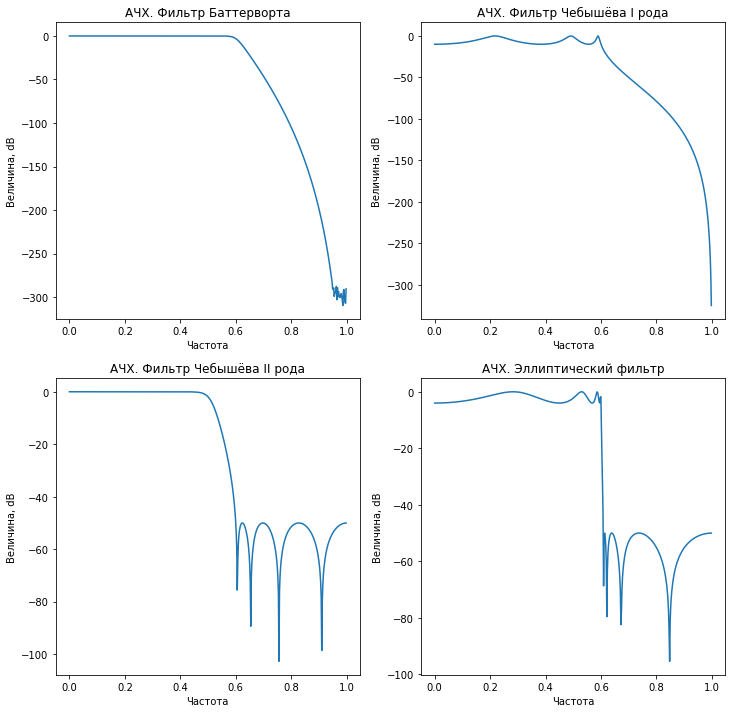

In [37]:
fcut = 300
fs = 1000
wn = fcut / (0.5*fs) 

# фильтр Баттерворта
b1, a1 = signal.butter(15, wn)
w1, h1 = signal.freqz(b1, a1)

# фильтр Чебышёва I рода
b2, a2 = signal.cheby1(6, 10, wn)
w2, h2 = signal.freqz(b2, a2)

# фильтр Чебышёва II рода
b3, a3 = signal.cheby2(8, 50, wn)
w3, h3 = signal.freqz(b3, a3)

# эллиптический фильтр
b4, a4 = signal.ellip(8, 4, 50, wn)
w4, h4 = signal.freqz(b4, a4)

def plotAFC():
  plt.figure(figsize=(12,12))
  plt.subplot(2,2,1)
  plt.plot(w1/np.pi, control.mag2db(np.abs(h1)))
  plt.title("АЧX. Фильтр Баттерворта")
  plt.xlabel('Частота')
  plt.ylabel('Величина, dB')

  plt.subplot(2,2,2)
  plt.plot(w2/np.pi, control.mag2db(np.abs(h2)))
  plt.title("АЧХ. Фильтр Чебышёва I рода")
  plt.xlabel('Частота')
  plt.ylabel('Величина, dB')

  plt.subplot(2,2,3)
  plt.plot(w3/np.pi, control.mag2db(np.abs(h3)))
  plt.title("АЧХ. Фильтр Чебышёва II рода")
  plt.xlabel('Частота')
  plt.ylabel('Величина, dB')

  plt.subplot(2,2,4)
  plt.plot(w4/np.pi, control.mag2db(np.abs(h4)))
  plt.title("АЧХ. Эллиптический фильтр")
  plt.xlabel('Частота')
  plt.ylabel('Величина, dB')

  plt.show()

plotAFC()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,title):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    plt.figure(figsize=(12,12))
    plt.title(title)
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    plt.show()
    

    # return z, p, k

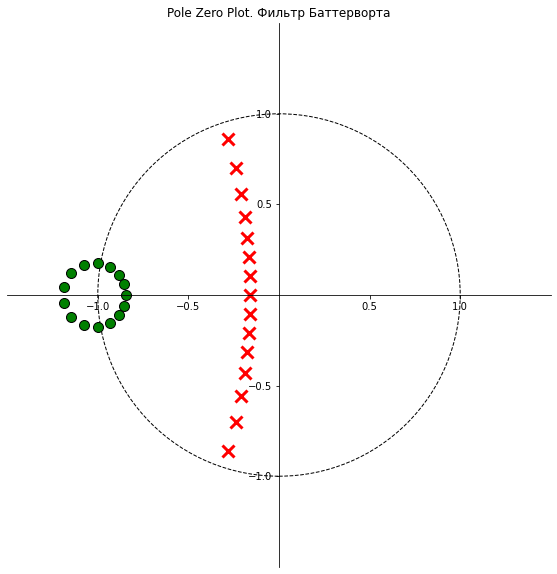

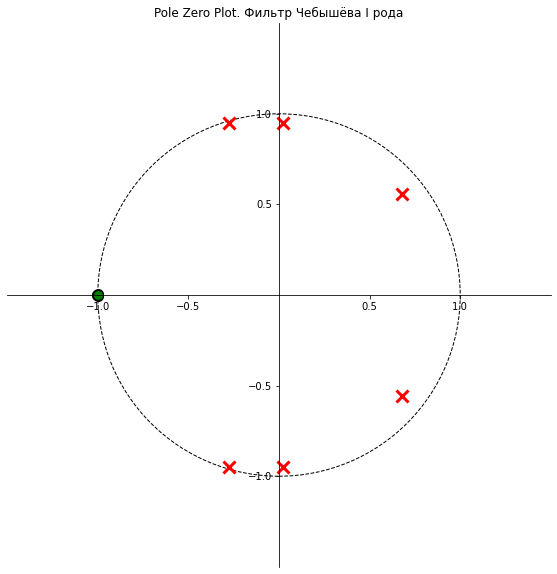

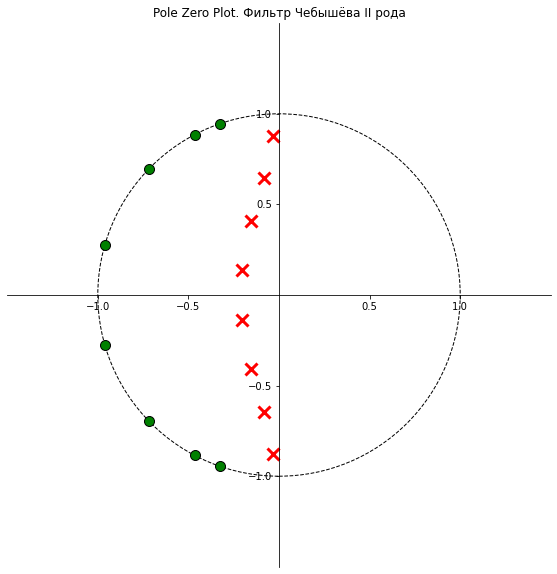

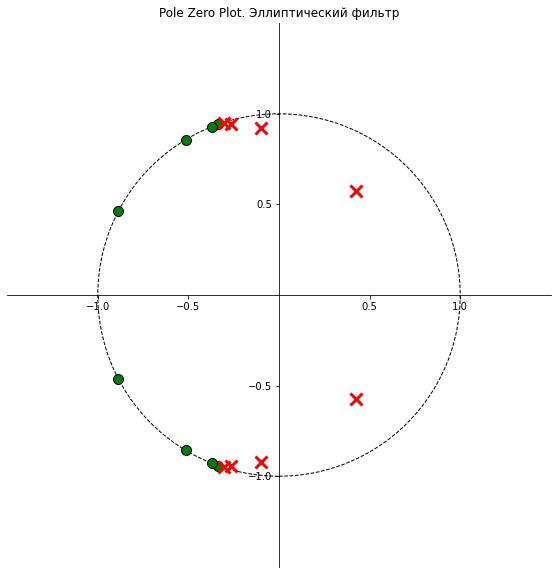

In [22]:
zplane(b1, a1, "Pole Zero Plot. Фильтр Баттерворта")
zplane(b2, a2, "Pole Zero Plot. Фильтр Чебышёва I рода")
zplane(b3, a3, "Pole Zero Plot. Фильтр Чебышёва II рода")
zplane(b4, a4, "Pole Zero Plot. Эллиптический фильтр")


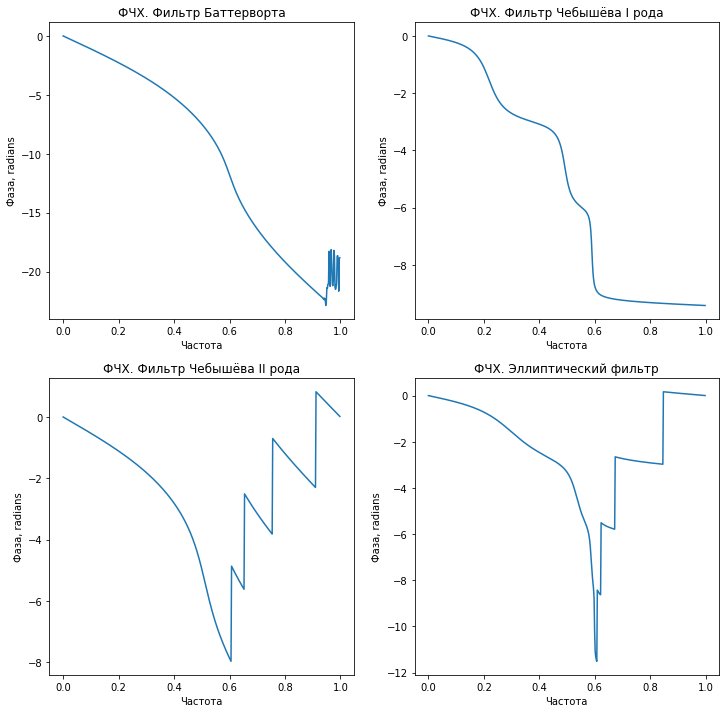

In [38]:
def plotPFC():
  plt.figure(figsize=(12,12))

  plt.subplot(2,2,1)
  plt.plot(w1/np.pi, np.unwrap(np.angle(h1)))
  plt.title("ФЧХ. Фильтр Баттерворта")
  plt.xlabel('Частота')
  plt.ylabel('Фаза, radians')

  plt.subplot(2,2,2)
  plt.plot(w2/np.pi,np.unwrap(np.angle(h2)))
  plt.title("ФЧХ. Фильтр Чебышёва I рода")
  plt.xlabel('Частота')
  plt.ylabel('Фаза, radians')

  plt.subplot(2,2,3)
  plt.plot(w3/np.pi,np.unwrap(np.angle(h3)))
  plt.title("ФЧХ. Фильтр Чебышёва II рода")
  plt.xlabel('Частота')
  plt.ylabel('Фаза, radians')

  plt.subplot(2,2,4)
  plt.plot(w4/np.pi,np.unwrap(np.angle(h4)))
  plt.title("ФЧХ. Эллиптический фильтр")
  plt.xlabel('Частота')
  plt.ylabel('Фаза, radians')

  plt.show()

plotPFC()

####Фильтр верхних частот


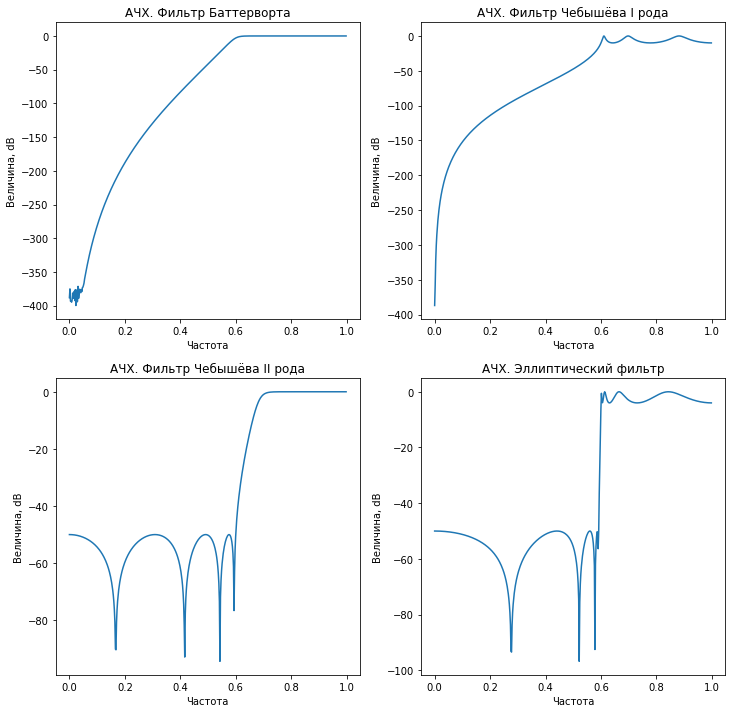

In [39]:
fcut = 300
fs = 1000
wn = fcut / (0.5*fs) 

# фильтр Баттерворта
b1, a1 = signal.butter(15, wn, 'high')
w1, h1 = signal.freqz(b1, a1)

# фильтр Чебышёва I рода
b2, a2 = signal.cheby1(6, 10, wn, 'high')
w2, h2 = signal.freqz(b2, a2)

# фильтр Чебышёва II рода
b3, a3 = signal.cheby2(8, 50, wn, 'high')
w3, h3 = signal.freqz(b3, a3)

# эллиптический фильтр
b4, a4 = signal.ellip(8, 4, 50, wn, 'high')
w4, h4 = signal.freqz(b4, a4)

plotAFC()

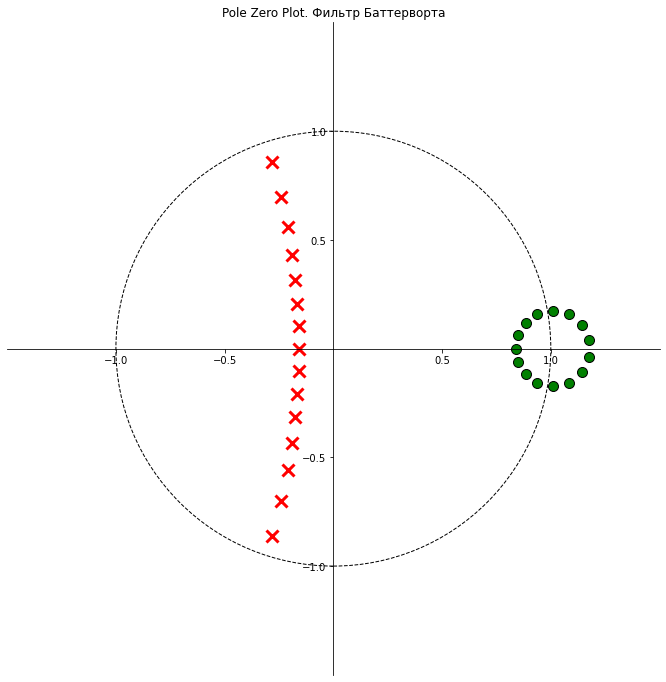

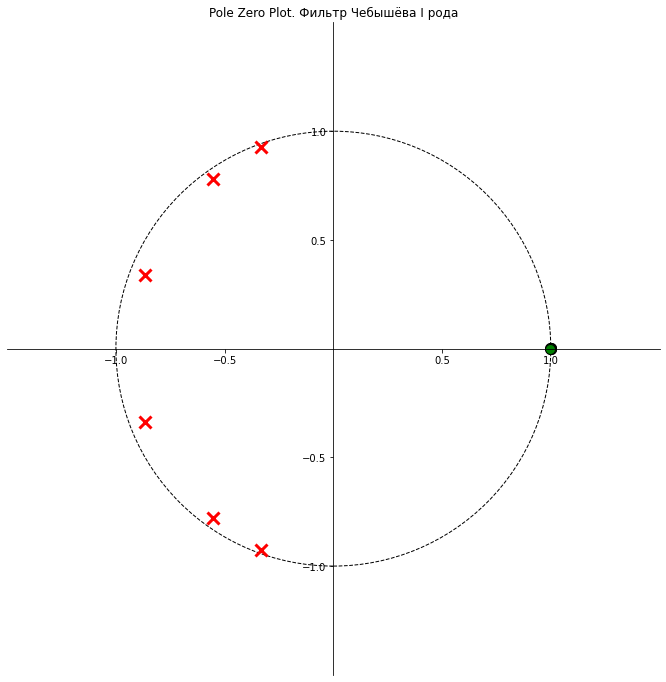

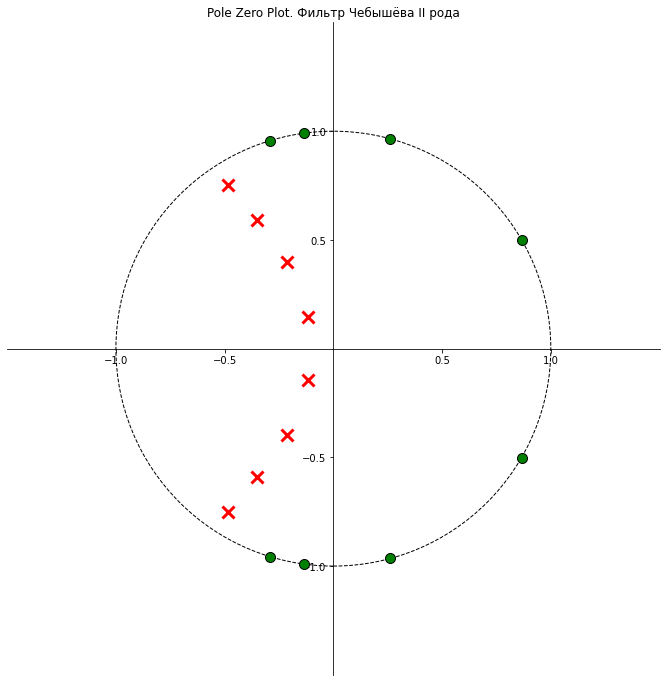

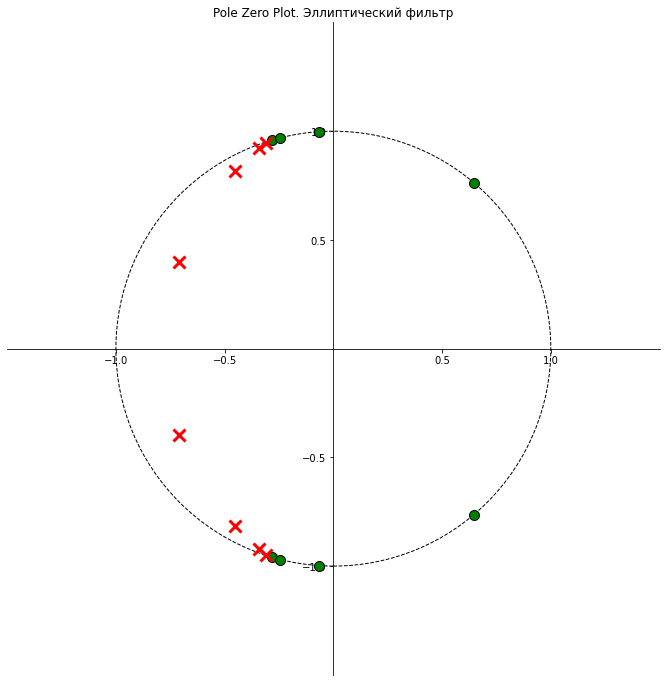

In [26]:
zplane(b1, a1, "Pole Zero Plot. Фильтр Баттерворта")
zplane(b2, a2, "Pole Zero Plot. Фильтр Чебышёва I рода")
zplane(b3, a3, "Pole Zero Plot. Фильтр Чебышёва II рода")
zplane(b4, a4, "Pole Zero Plot. Эллиптический фильтр")

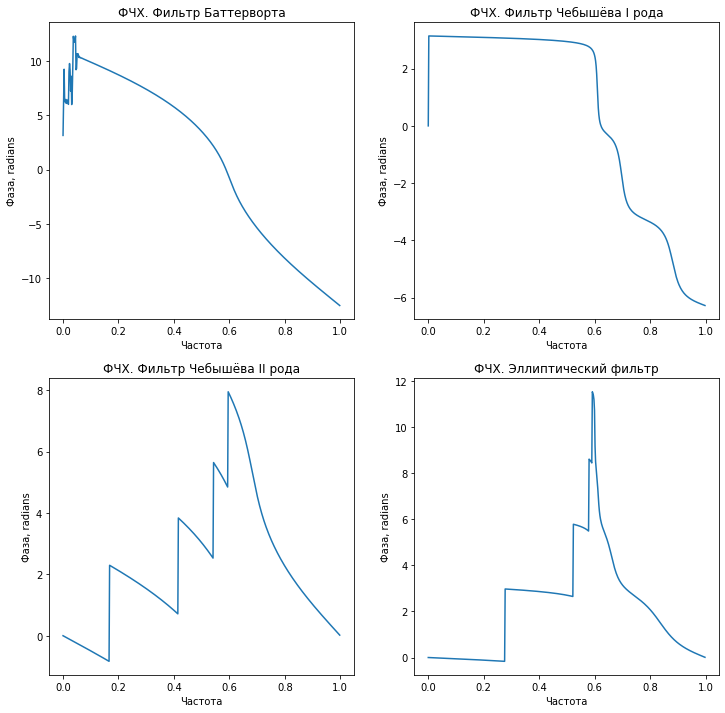

In [40]:
plotPFC()

####Полосовой фильтр

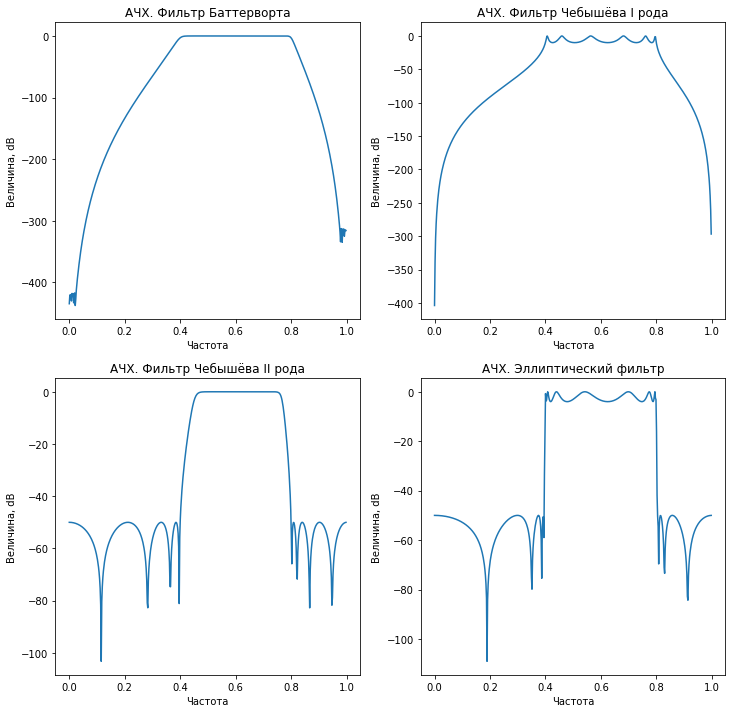

In [30]:
f_start = 200
f_end = 400
fs = 1000
wn = [f_start/(fs/2), f_end/(fs/2)]

# фильтр Баттерворта
b1, a1 = signal.butter(15, wn, 'bandpass')
w1, h1 = signal.freqz(b1, a1)

# фильтр Чебышёва I рода
b2, a2 = signal.cheby1(6, 10, wn, 'bandpass')
w2, h2 = signal.freqz(b2, a2)

# фильтр Чебышёва II рода
b3, a3 = signal.cheby2(8, 50, wn, 'bandpass')
w3, h3 = signal.freqz(b3, a3)

# эллиптический фильтр
b4, a4 = signal.ellip(8, 4, 50, wn, 'bandpass')
w4, h4 = signal.freqz(b4, a4)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(w1/np.pi, control.mag2db(np.abs(h1)))
plt.title("АЧХ. Фильтр Баттерворта")
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,2)
plt.plot(w2/np.pi, control.mag2db(np.abs(h2)))
plt.title("АЧХ. Фильтр Чебышёва I рода")
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,3)
plt.plot(w3/np.pi, control.mag2db(np.abs(h3)))
plt.title("АЧХ. Фильтр Чебышёва II рода")
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,4)
plt.plot(w4/np.pi, control.mag2db(np.abs(h4)))
plt.title("АЧХ. Эллиптический фильтр")
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.show()

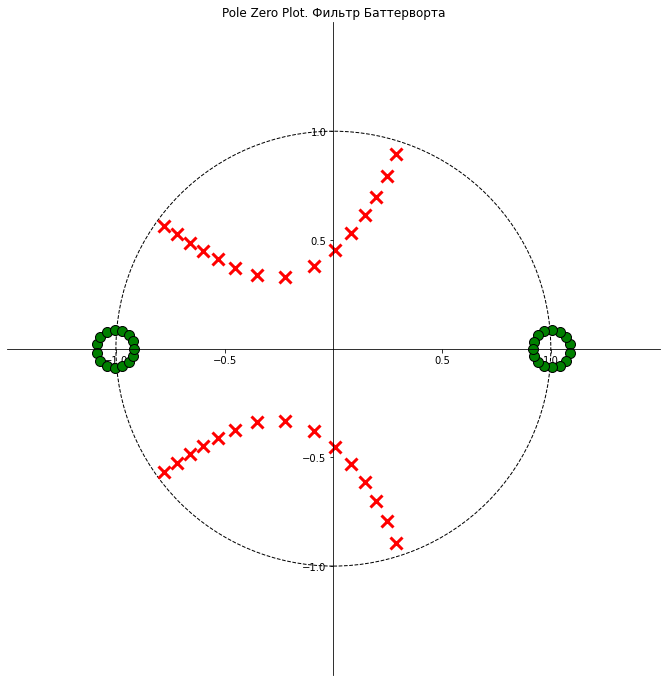

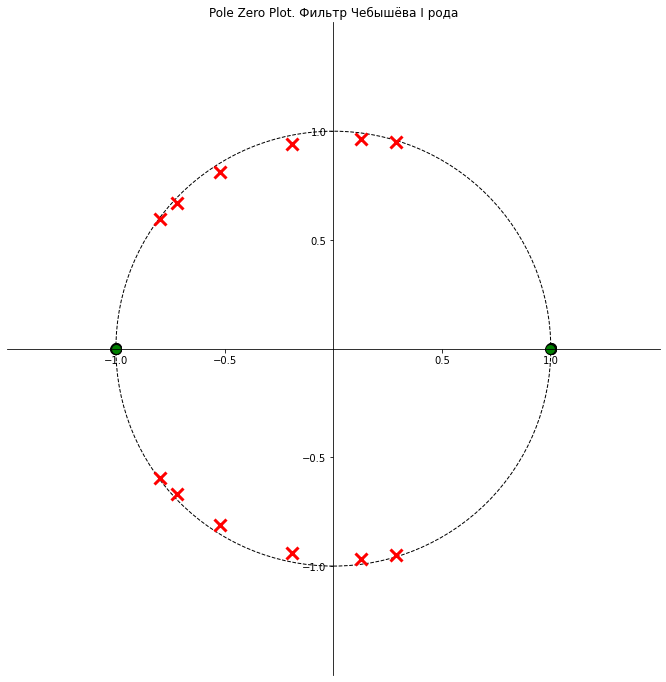

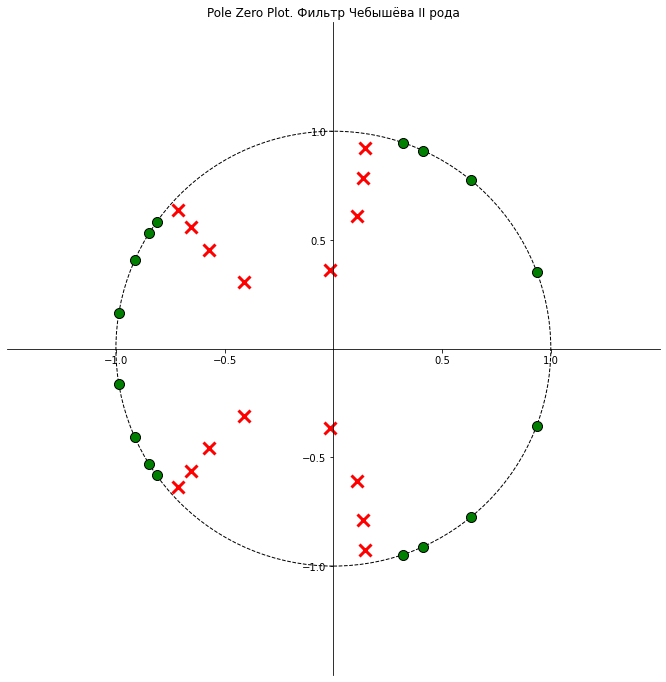

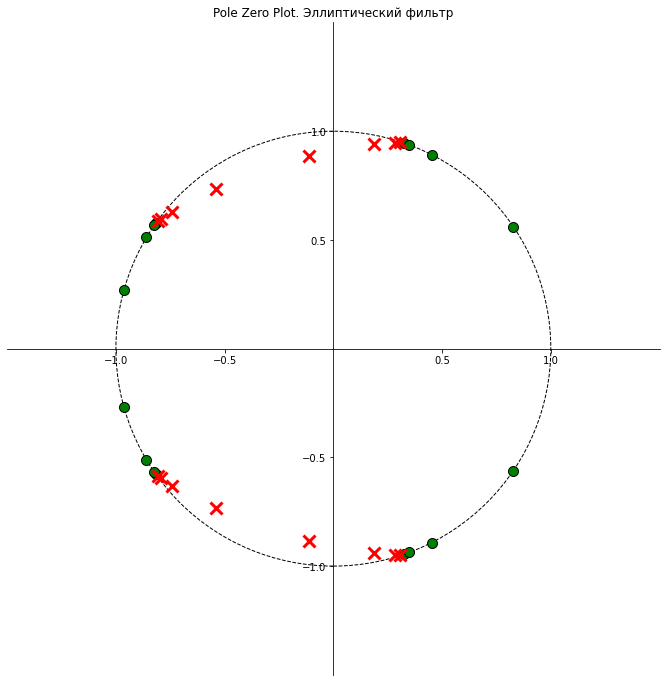

In [31]:
zplane(b1, a1, "Pole Zero Plot. Фильтр Баттерворта")
zplane(b2, a2, "Pole Zero Plot. Фильтр Чебышёва I рода")
zplane(b3, a3, "Pole Zero Plot. Фильтр Чебышёва II рода")
zplane(b4, a4, "Pole Zero Plot. Эллиптический фильтр")

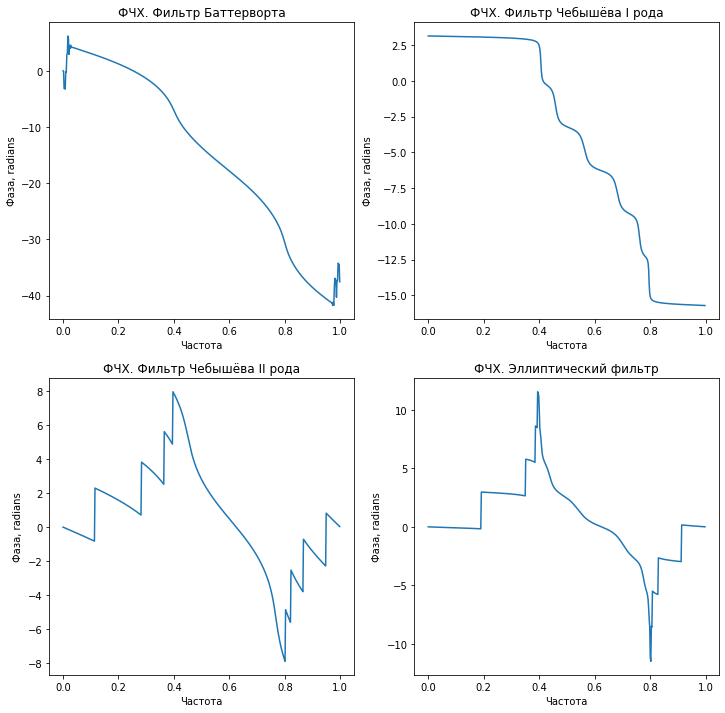

In [32]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.plot(w1/np.pi, np.unwrap(np.angle(h1)))
plt.title("ФЧХ. Фильтр Баттерворта")
plt.xlabel('Частота')
plt.ylabel('Фаза, radians')

plt.subplot(2,2,2)
plt.plot(w2/np.pi,np.unwrap(np.angle(h2)))
plt.title("ФЧХ. Фильтр Чебышёва I рода")
plt.xlabel('Частота')
plt.ylabel('Фаза, radians')

plt.subplot(2,2,3)
plt.plot(w3/np.pi,np.unwrap(np.angle(h3)))
plt.title("ФЧХ. Фильтр Чебышёва II рода")
plt.xlabel('Частота')
plt.ylabel('Фаза, radians')

plt.subplot(2,2,4)
plt.plot(w4/np.pi,np.unwrap(np.angle(h4)))
plt.title("ФЧХ. Эллиптический фильтр")
plt.xlabel('Частота')
plt.ylabel('Фаза, radians')

plt.show()

#### Режекторный фильтр

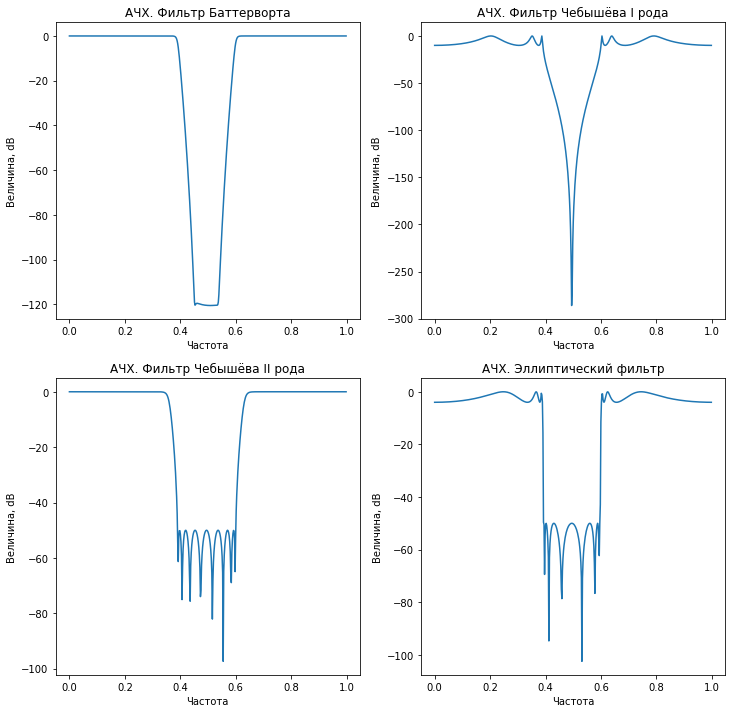

In [41]:
f_start = 390
f_end = 600
fs = 2000
wn = [f_start/(fs/2), f_end/(fs/2)]

# фильтр Баттерворта
b1, a1 = signal.butter(15, wn, 'bandstop')
w1, h1 = signal.freqz(b1, a1)

# фильтр Чебышёва I рода
b2, a2 = signal.cheby1(6, 10, wn, 'bandstop')
w2, h2 = signal.freqz(b2, a2)

# фильтр Чебышёва II рода
b3, a3 = signal.cheby2(8, 50, wn, 'bandstop')
w3, h3 = signal.freqz(b3, a3)

# эллиптический фильтр
b4, a4 = signal.ellip(8, 4, 50, wn, 'bandstop')
w4, h4 = signal.freqz(b4, a4)

plotAFC()

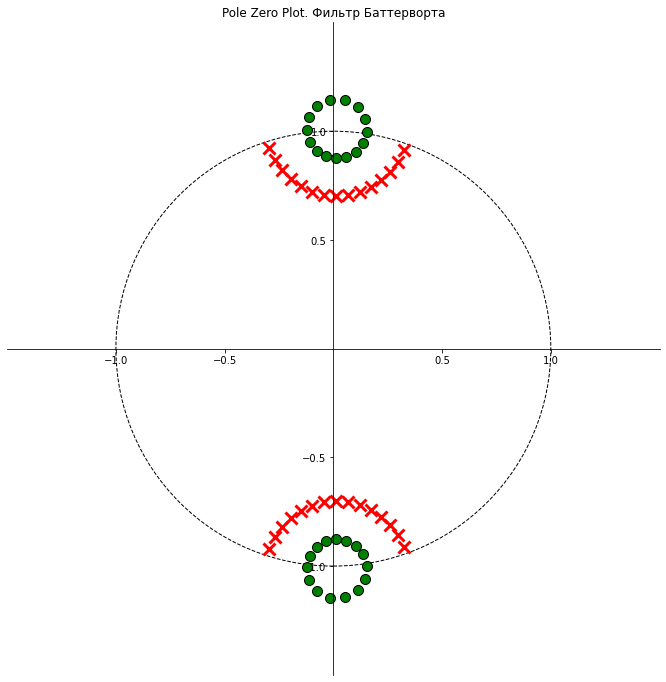

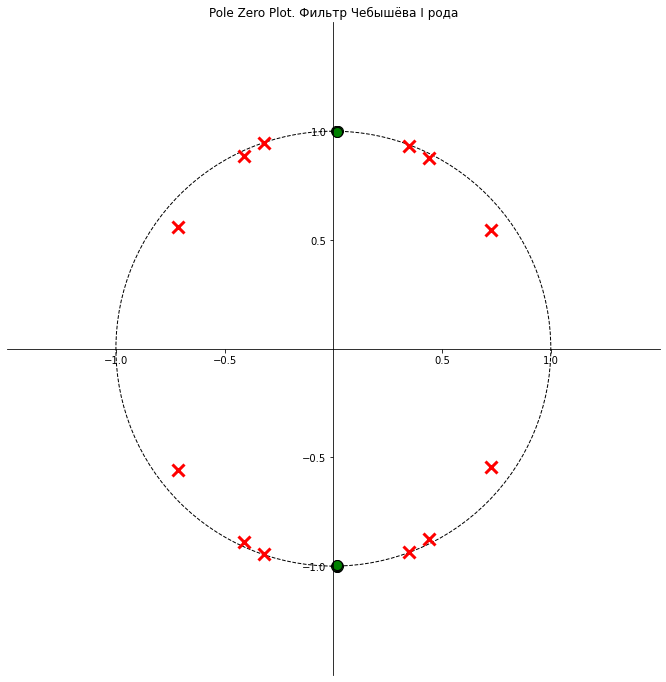

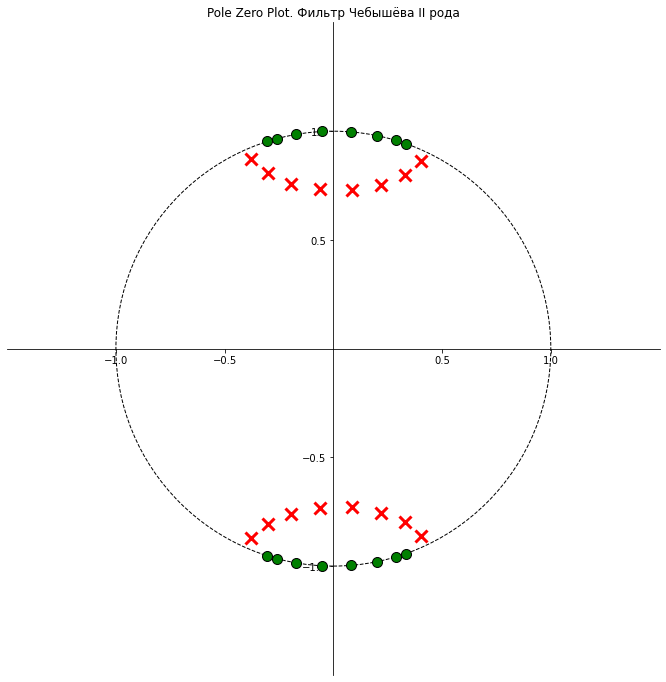

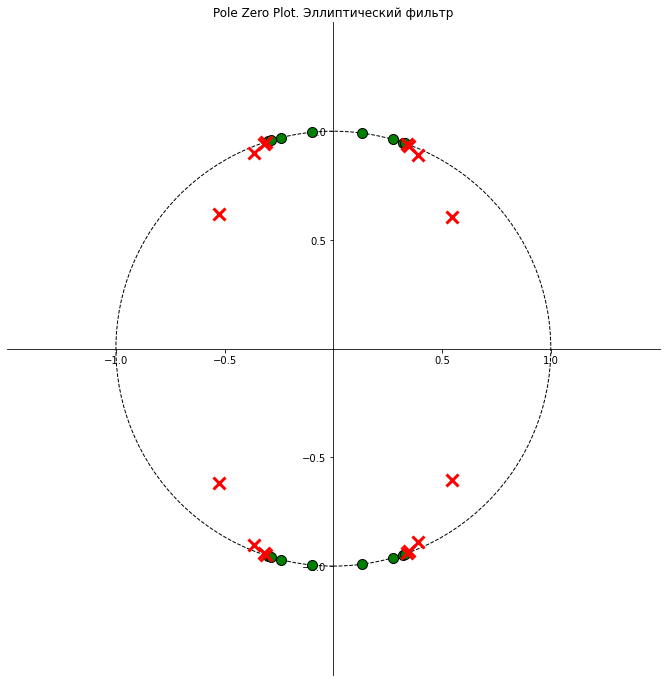

In [42]:
zplane(b1, a1, "Pole Zero Plot. Фильтр Баттерворта")
zplane(b2, a2, "Pole Zero Plot. Фильтр Чебышёва I рода")
zplane(b3, a3, "Pole Zero Plot. Фильтр Чебышёва II рода")
zplane(b4, a4, "Pole Zero Plot. Эллиптический фильтр")

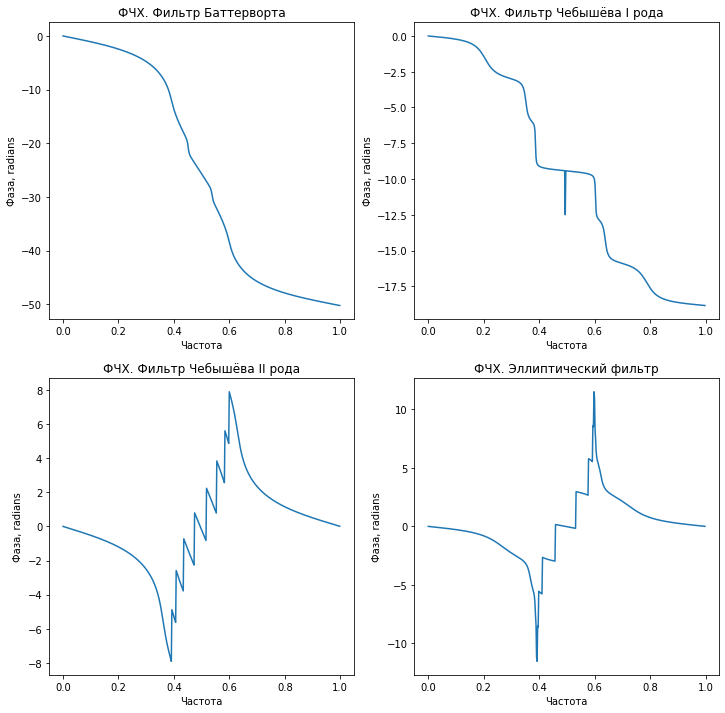

In [43]:
plotPFC()

## Аналоговые фильтры

#### Фильтр нижних частот

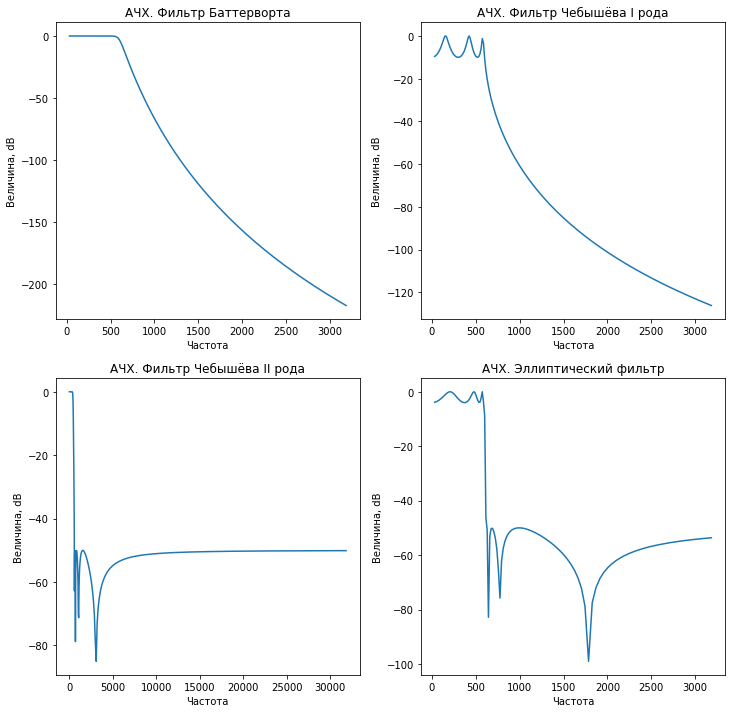

In [46]:
fcut = 300
fs = 1000
wn = 2*np.pi*fcut

# фильтр Баттерворта
b1, a1 = signal.butter(15, wn, analog=True)
w1, h1 = signal.freqs(b1, a1)

# фильтр Чебышёва I рода
b2, a2 = signal.cheby1(6, 10, wn, analog=True)
w2, h2 = signal.freqs(b2, a2)

# фильтр Чебышёва II рода
b3, a3 = signal.cheby2(8, 50, wn, analog=True)
w3, h3 = signal.freqs(b3, a3)

# эллиптический фильтр
b4, a4 = signal.ellip(8, 4, 50, wn, analog=True)
w4, h4 = signal.freqs(b4, a4)

plotAFC()

#### Фильтр верхних частот

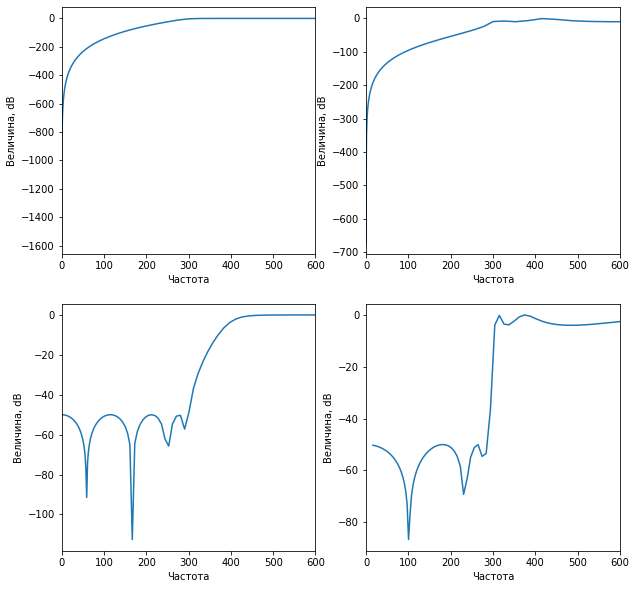

In [49]:
fcut = 300
fs = 1000
wn = 2*np.pi*fcut

# фильтр Баттерворта
b1, a1 = signal.butter(15, wn, 'high', analog=True)
w1, h1 = signal.freqs(b1, a1)

# фильтр Чебышёва I рода
b2, a2 = signal.cheby1(6, 10, wn, 'high', analog=True)
w2, h2 = signal.freqs(b2, a2)

# фильтр Чебышёва II рода
b3, a3 = signal.cheby2(8, 50, wn, 'high', analog=True)
w3, h3 = signal.freqs(b3, a3)

# эллиптический фильтр
b4, a4 = signal.ellip(8, 4, 50, wn, 'high', analog=True)
w4, h4 = signal.freqs(b4, a4)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.xlim(0, 2*fcut)
plt.plot(w1/(2*np.pi), control.mag2db(np.abs(h1)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,2)
plt.xlim(0, 2*fcut)
plt.plot(w2/(2*np.pi), control.mag2db(np.abs(h2)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,3)
plt.xlim(0, 2*fcut)
plt.plot(w3/(2*np.pi), control.mag2db(np.abs(h3)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,4)
plt.xlim(0, 2*fcut)
plt.plot(w4/(2*np.pi), control.mag2db(np.abs(h4)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.show()

#### Полосовой фильтр

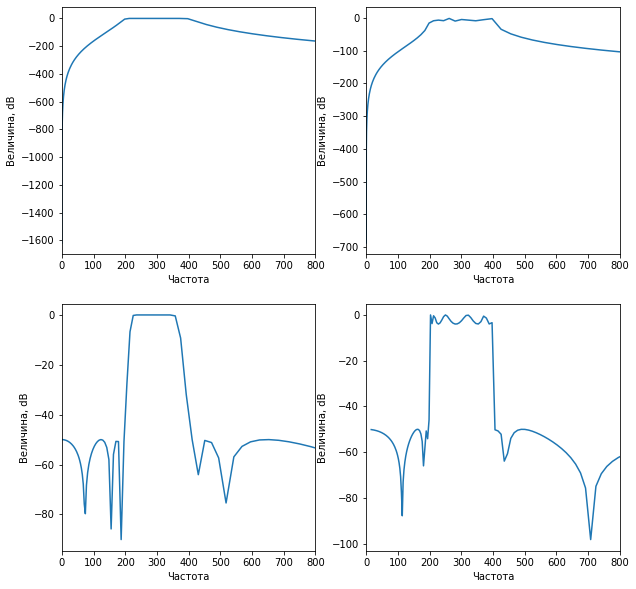

In [50]:
f_start = 200
f_end = 400
fs = 1000
wn = [2*np.pi*f_start, 2*np.pi*f_end]

# фильтр Баттерворта
b1, a1 = signal.butter(15, wn, 'bandpass', analog=True)
w1, h1 = signal.freqs(b1, a1)

# фильтр Чебышёва I рода
b2, a2 = signal.cheby1(6, 10, wn, 'bandpass', analog=True)
w2, h2 = signal.freqs(b2, a2)

# фильтр Чебышёва II рода
b3, a3 = signal.cheby2(8, 50, wn, 'bandpass', analog=True)
w3, h3 = signal.freqs(b3, a3)

# эллиптический фильтр
b4, a4 = signal.ellip(8, 4, 50, wn, 'bandpass', analog=True)
w4, h4 = signal.freqs(b4, a4)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.xlim(0, 2*f_end)
plt.plot(w1/(2*np.pi), control.mag2db(np.abs(h1)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,2)
plt.xlim(0, 2*f_end)
plt.plot(w2/(2*np.pi), control.mag2db(np.abs(h2)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,3)
plt.xlim(0, 2*f_end)
plt.plot(w3/(2*np.pi), control.mag2db(np.abs(h3)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,4)
plt.xlim(0, 2*f_end)
plt.plot(w4/(2*np.pi), control.mag2db(np.abs(h4)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.show()

#### Режекторный фильтр

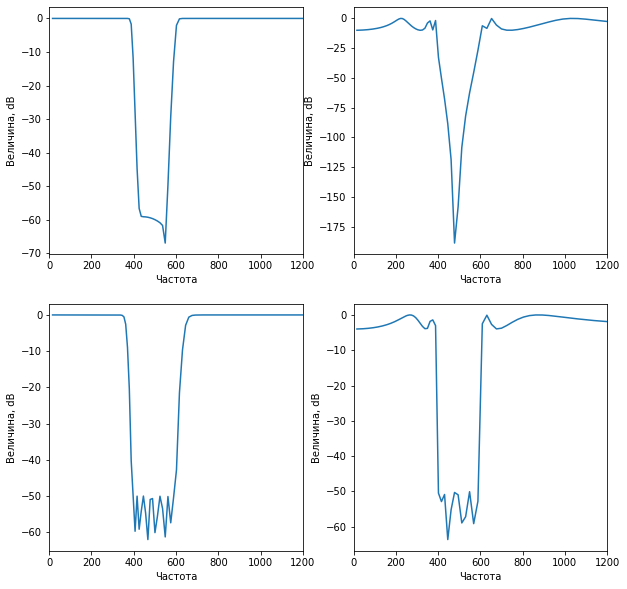

In [51]:
f_start = 390
f_end = 600
fs = 2000
wn = [2*np.pi*f_start, 2*np.pi*f_end]

# фильтр Баттерворта
b1, a1 = signal.butter(15, wn, 'bandstop', analog=True)
w1, h1 = signal.freqs(b1, a1)

# фильтр Чебышёва I рода
b2, a2 = signal.cheby1(6, 10, wn, 'bandstop', analog=True)
w2, h2 = signal.freqs(b2, a2)

# фильтр Чебышёва II рода
b3, a3 = signal.cheby2(8, 50, wn, 'bandstop', analog=True)
w3, h3 = signal.freqs(b3, a3)

# эллиптический фильтр
b4, a4 = signal.ellip(8, 4, 50, wn, 'bandstop', analog=True)
w4, h4 = signal.freqs(b4, a4)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.xlim(0, 2*f_end)
plt.plot(w1/(2*np.pi), control.mag2db(np.abs(h1)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,2)
plt.xlim(0, 2*f_end)
plt.plot(w2/(2*np.pi), control.mag2db(np.abs(h2)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,3)
plt.xlim(0, 2*f_end)
plt.plot(w3/(2*np.pi), control.mag2db(np.abs(h3)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.subplot(2,2,4)
plt.xlim(0, 2*f_end)
plt.plot(w4/(2*np.pi), control.mag2db(np.abs(h4)))
plt.xlabel('Частота')
plt.ylabel('Величина, dB')

plt.show()

## Группа кривых для цифровых фильтров

#### Фильтр Баттерворта

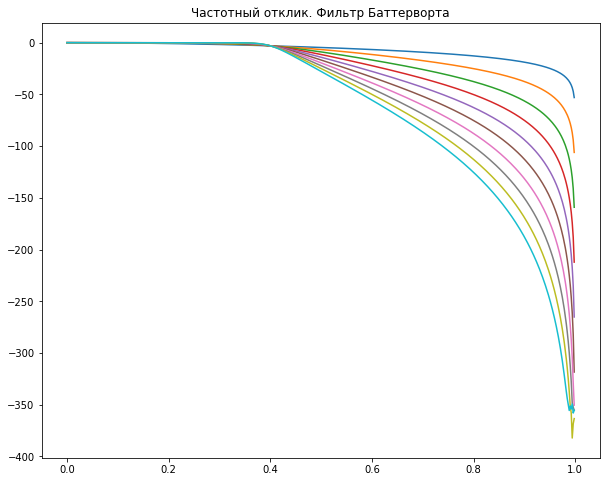

In [52]:
fc=200
fs=1000

fig, ax = plt.subplots(figsize=(10,8))
for i in range(1, 11):
    b, a = signal.butter(i, fc/(fs*0.5))
    w, h = signal.freqz(b,a)
    ax.plot(w/np.pi, control.mag2db(np.abs(h)))

plt.title('Частотный отклик. Фильтр Баттерворта')
plt.show()

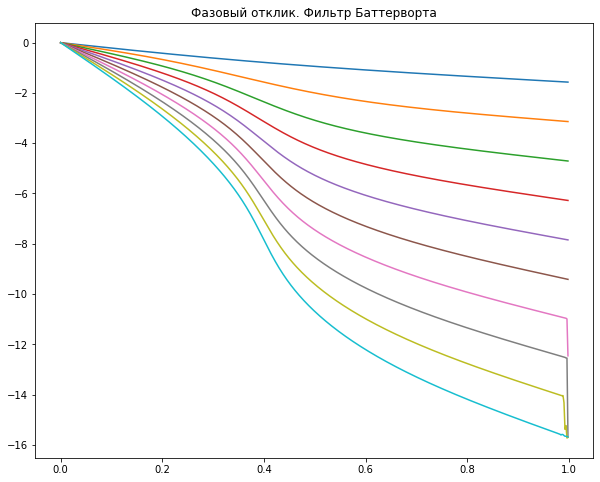

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
for i in range(1, 11):
    b, a = signal.butter(i, fc/(fs*0.5))
    w, h = signal.freqz(b,a)
    ax.plot(w/np.pi,np.unwrap(np.angle(h)));
plt.title('Фазовый отклик. Фильтр Баттерворта')
plt.show()

#### Фильтр Чебышёва I рода

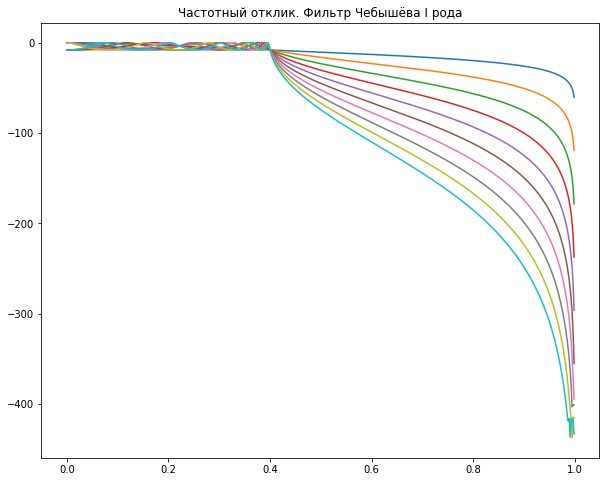

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
for i in range(1, 11):
    b, a = signal.cheby1(i, 8, fc/(fs*0.5))
    w, h = signal.freqz(b,a)
    ax.plot(w/np.pi, control.mag2db(np.abs(h)))

plt.title('Частотный отклик. Фильтр Чебышёва I рода')
plt.show()

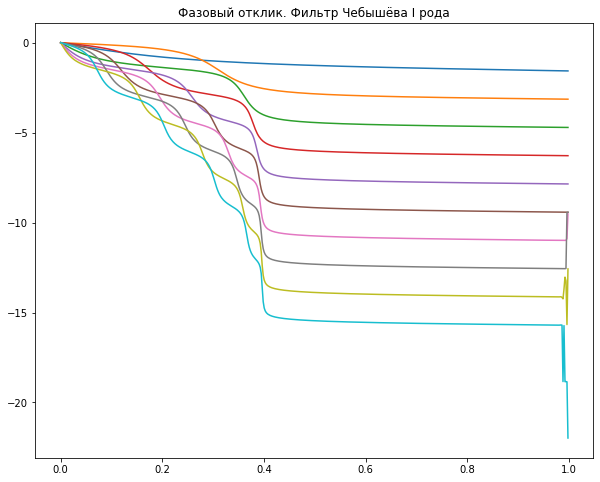

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
for i in range(1, 11):
    b, a = signal.cheby1(i, 8, fc/(fs*0.5))
    w, h = signal.freqz(b,a)
    ax.plot(w/np.pi,np.unwrap(np.angle(h)));
plt.title('Фазовый отклик. Фильтр Чебышёва I рода')
plt.show()

#### Фильтр Чебышёва II рода

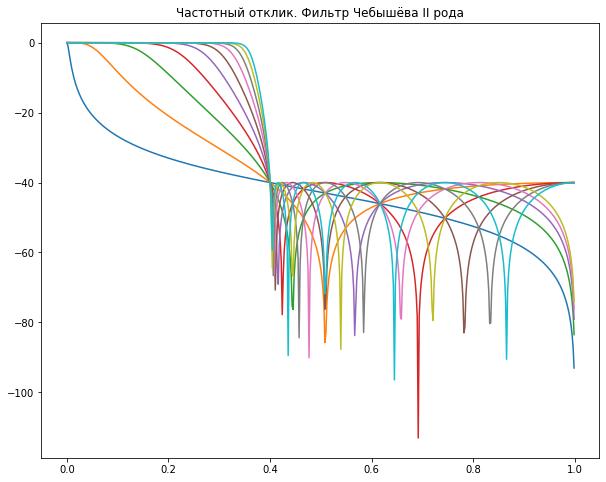

In [54]:
fig, ax = plt.subplots(figsize=(10,8))
for i in range(1, 11):
    b, a = signal.cheby2(i, 40, fc/(fs*0.5))
    w, h = signal.freqz(b,a)
    ax.plot(w/np.pi, control.mag2db(np.abs(h)))

plt.title('Частотный отклик. Фильтр Чебышёва II рода')
plt.show()

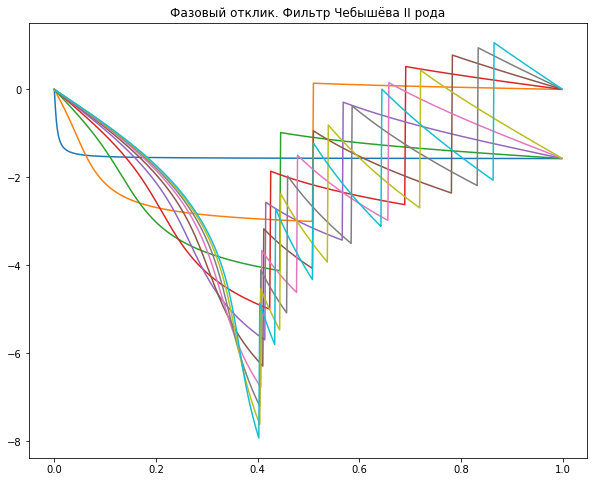

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
for i in range(1, 11):
    b, a = signal.cheby2(i, 40, fc/(fs*0.5))
    w, h = signal.freqz(b,a)
    ax.plot(w/np.pi,np.unwrap(np.angle(h)));
plt.title('Фазовый отклик. Фильтр Чебышёва II рода')
plt.show()

#### Эллиптический фильтр

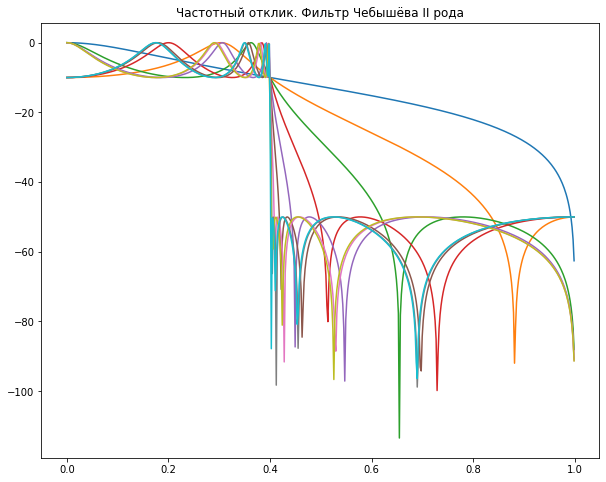

In [55]:
fig, ax = plt.subplots(figsize=(10,8))
for i in range(1, 11):
    b, a = signal.ellip(i, 10, 50, fc/(fs*0.5))
    w, h = signal.freqz(b,a)
    ax.plot(w/np.pi, control.mag2db(np.abs(h)))

plt.title('Частотный отклик. Фильтр Чебышёва II рода')
plt.show()

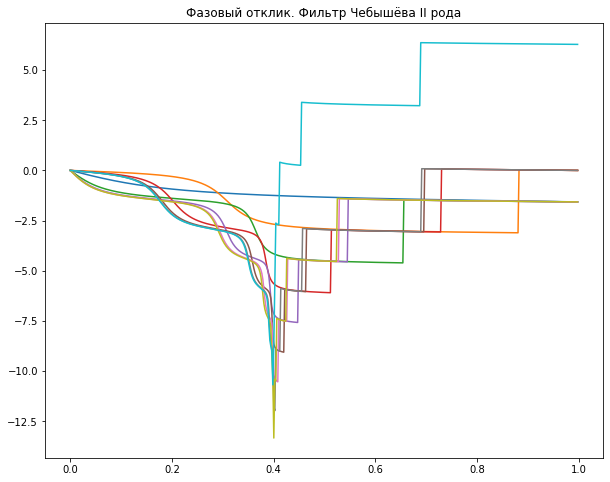

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
for i in range(1, 11):
    b, a = signal.ellip(i, 10, 50, fc/(fs*0.5))
    w, h = signal.freqz(b,a)
    ax.plot(w/np.pi,np.unwrap(np.angle(h)));
plt.title('Фазовый отклик. Фильтр Чебышёва II рода')
plt.show()

## Прямоугольные импульсы

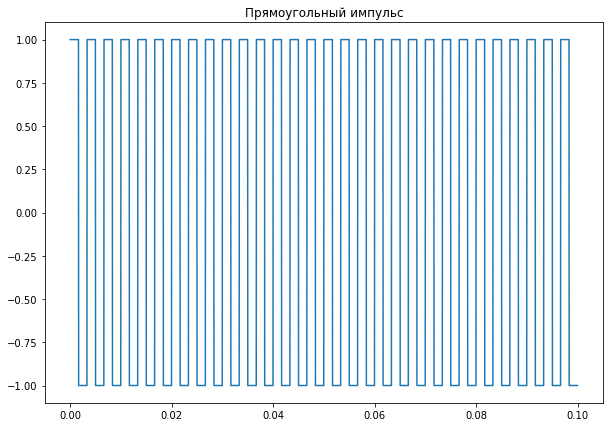

In [56]:
f = 300
fs = 3000

t = np.linspace(0, 0.1, fs, endpoint=False)
y = signal.square(2 * np.pi * f * t)

plt.figure(figsize=(10,7))
plt.title("Прямоугольный импульс")
plt.plot(t, y)
plt.show()

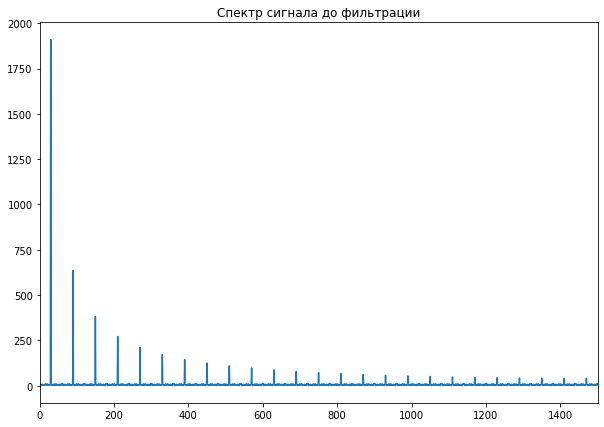

In [57]:
Y = np.fft.fft(y)
f = np.arange(fs)

plt.figure(figsize=(10,7))
plt.plot(f, np.abs(Y))
plt.xlim(0, fs/2)
plt.title('Спектр сигнала до фильтрации')

plt.show()

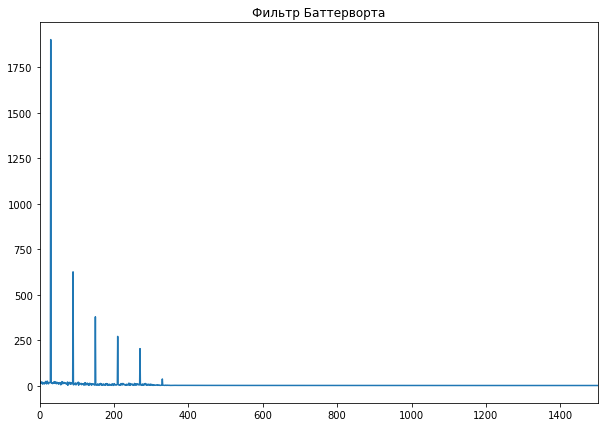

In [58]:
fc=300
wn = fc/(fs/2)
b1, a1=signal.butter(15, wn)
s1 = signal.lfilter(b1, a1, y)
S1 = np.fft.fft(s1)

plt.figure(figsize=(10,7))
plt.plot(f, np.abs(S1))
plt.xlim(0, fs/2)
plt.title('Фильтр Баттерворта')
plt.show()

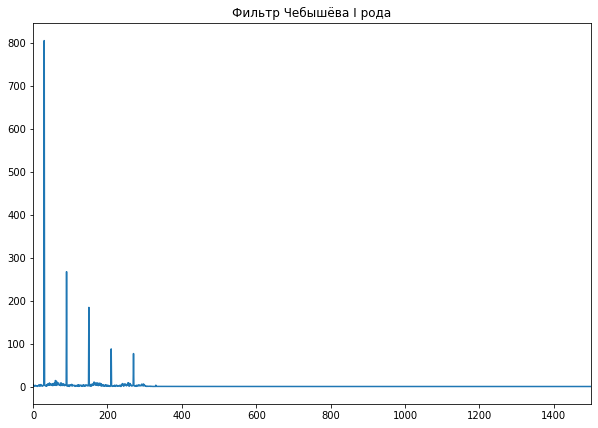

In [59]:
b2, a2 = signal.cheby1(8,10,wn)
s2 = signal.lfilter(b2, a2, y)
S2 = np.fft.fft(s2)

plt.figure(figsize=(10,7))
plt.plot(f, np.abs(S2))
plt.xlim(0, fs/2)
plt.title('Фильтр Чебышёва I рода')
plt.show()

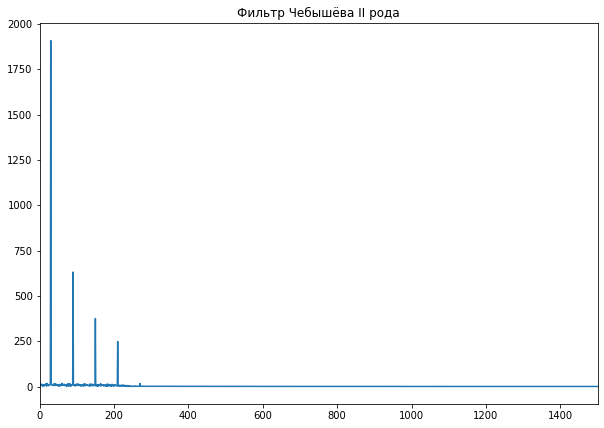

In [60]:
b3, a3 = signal.cheby2(8,50,wn)
s3 = signal.lfilter(b3, a3, y)
S3 = np.fft.fft(s3)

plt.figure(figsize=(10,7))
plt.plot(f, np.abs(S3))
plt.xlim(0, fs/2)
plt.title('Фильтр Чебышёва II рода')
plt.show()

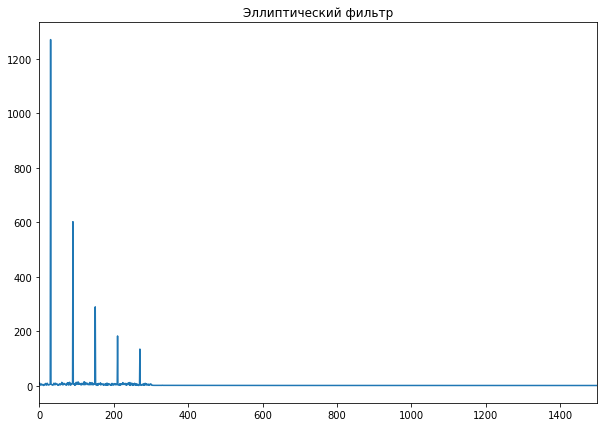

In [61]:
b4, a4 = signal.ellip(8,4,50,wn)
s4 = signal.lfilter(b4, a4, y)
S4 = np.fft.fft(s4)

plt.figure(figsize=(10,7))
plt.plot(f, np.abs(S4))
plt.xlim(0, fs/2)
plt.title('Эллиптический фильтр')
plt.show()